# Crash course in Network Theory

Network applications span a wide range of disparate topics, like social networks, the world wide web, power grids, solving mazes, constructing efficient highway networks, text mining and much more.

<img src="assets/Picture_maze_solving.gif" alt="maze" style="float:left" width="200">
<img src="assets/gillespie.gif", alt="pandemic" style="float:right">
<img src="assets/PrimAlgDemo.gif" alt="minimum spanning tree">

In biology and medicine, graph theory naturally lends itself to dynamics of molecular interaction inside cells 
(metabolic or protein-protein networks), neuroscience and and ecological networks. As an example of a possible network, consider the image below of a [disease network](https://barabasi.com/f/320.pdf). Constructed by examining interactions and overlap between disease-related genes in various disorders, this example demonstrates how we can apply network science to a problem which is not classically defined in a network framework.

<img src="assets/barabasi_disease_network.png" alt="disease network"  width="600" />


Network theory is also being increasingly used in neuroscience, in the field coined **connectomics**. Nothing about the idea is new, as it dates back at last 100 years, but only with advances in imaging technologies have we started to gain access into what it looks like. Some neuroscientists believe that if we had perfect resolution of an individual's connectome, this would (in theory) allow full access into that person's memories, experiences, knowledge and personality.

<img src="assets/DataC7-e1307568684287-720x553.jpg" alt="Human connectome project" style="float:right" width="380">
                                                                                        
We leave you with a few articles to appreciate network theory as a tool to study biology.

https://barabasi.com/f/320.pdf

https://www.nature.com/articles/nrg.2016.87

https://www.nature.com/articles/nrg1272

For great explanations of more or less advanced network science concepts and algorithms in Python, we recommend to check out [T.M.](https://je-suis-tm.github.io/#)

## Network representation

Networks/graphs are most naturally visualized as a set of points (nodes) connected by lines (edges). The network is thus simply the set of vertices and edges: $G=(V,E)$

<img src="assets/graph_random_circle.png" width=300 style="float:left">
<img src="assets/matrix_example.png" width=500>

This data is typically stored as a list of edges. Another equivalent representation is the adjacency matrix, which is less intuitive, but sometimes mathematically convenient (color code: black=1; white=0). This is essentially all a network is.

<!--
\begin{bmatrix}
A_{11} & A_{12} & A_{13}\\
A_{21} & A_{22} & A_{23}
\end{bmatrix}
-->


In [1]:
import sys
import time
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

####  Exercise 1. construct the matrix (numpy array), A representing the following graph. 

<img
src="assets/ex0_1.png"
width=200
style="float: left"
/>

Hint: we use the connection *from* row *to* column. So for example, the link from node A (#1) to B (#2) should be at the 1st row and 2rd column).

In [2]:
# %load solutions/ex0_1.py
A = np.array([
       [0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.]])

A

array([[0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1.],
       [0., 0., 0., 0., 0.]])

The two other common ways to represent graph data is in terms of storing each edge (*edgelist*) as an array of pairs, or and adjacency list, which is a dictionary-like structure. The main point is that they are all equivalent (interchangable), they only differ in memory demands: when a network is sparse, the matrix wastes space by storing every 0-entry. 

In [3]:
# edgelist 
# G = [(A,B), (A,C), (B,A), (C,B)]

# adjacencylist
# G = {A: [B,C], B:[A], C:[B]}

# matrix
# [[0,1,1], [1,0,0], [0,1,0]]

## Graphs in Python
`NetworkX` is a python library specialized for working with graphs. They provide a class `networkx.Graph` which stores a network as a list of edges. We can convert freely between the different representations using `networkx`.

In [4]:
import networkx as nx
G = nx.from_numpy_array(A)

# just to relabel from numbers to letters:
labeldict = {num:let for num,let in zip(range(5), 'ABCDE')} 
G = nx.relabel_nodes(G, labeldict)

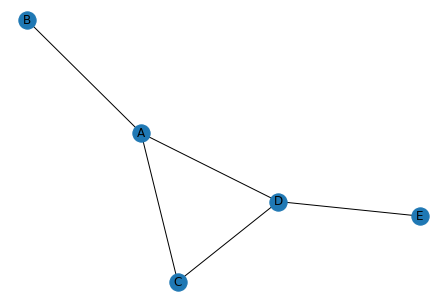

In [5]:
# plotting a basic network is straight forward
nx.draw(G, with_labels=True)

we can define different plotting layouts by specifying the position using some plotting algorithm

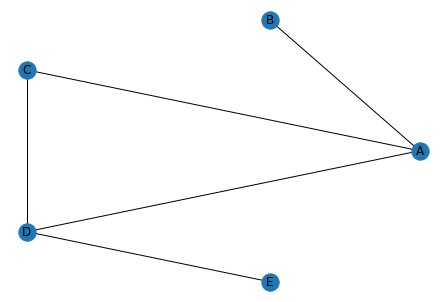

In [6]:
pos = nx.circular_layout(G)
nx.draw(G, pos, with_labels=True)

In [7]:
# see how the underlying representation used by networkx
G.edges

EdgeView([('A', 'B'), ('A', 'D'), ('A', 'C'), ('C', 'D'), ('D', 'E')])

## Directed versus undirected networks
This point is important to consider: for instance, the WWW is directed, but a friendship network is not.

Above, `networkx` by default created and drew an *undirected* network. We can fix this by simply passing the `nx.Digraph` class to ensure we construct a directed graph. 

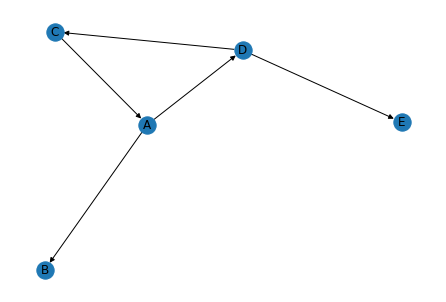

In [8]:
G_dir = nx.from_numpy_array(A, create_using=nx.DiGraph)
G_dir = nx.relabel_nodes(G_dir, labeldict)


nx.draw(G_dir, with_labels=True)

And we can just as easily transform it back into a numpy array:

In [9]:
M = nx.to_numpy_array(G_dir)

In [10]:
# your turn: confirm that M is identical to A
np.all(M == A) #they are the same as expected

True

### Some useful networkx commands

We can inspect the neighbors of a given edge. `G.neighbors()` returns an generator object, so we unpack it using `*` to display it.

In [11]:
# G.neighbors
[*G.neighbors("A")]

['B', 'D', 'C']

We can select a subset of the graph

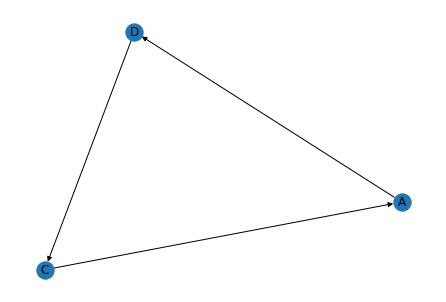

In [12]:
sub_G = G_dir.subgraph(["A","D","C"])
nx.draw(sub_G, with_labels=True)

And do some basic inspection

In [13]:
print(G.nodes())
print("number of nodes: ", G.number_of_nodes()) # equivalent to len(G), or G.order()
print(G.edges())
print("number of edges: ", G.number_of_edges()) # equivalent to G.size() for binary networks 


if G.has_edge("D","E"): 
    print("edge D->E exists")
else: print("D->E does not exist")

['A', 'B', 'C', 'D', 'E']
number of nodes:  5
[('A', 'B'), ('A', 'D'), ('A', 'C'), ('C', 'D'), ('D', 'E')]
number of edges:  5
edge D->E exists


### Paths
Many networks represent a medium for the flow of some unit, be it people or information. Therefore, we are interested in the distance between nodes, and the path we need to take to get from A to B.

Shortest path from D to B: ['D', 'A', 'B']


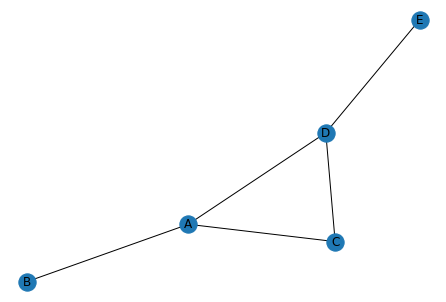

In [14]:
nx.draw(G, with_labels=True)
print("Shortest path from D to B:", nx.shortest_path(G, "D", "B"))

Adding/removing edges from G is also simple

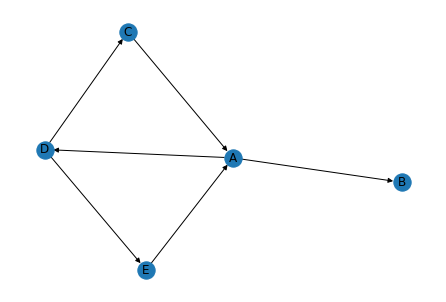

--------------------------------------------------


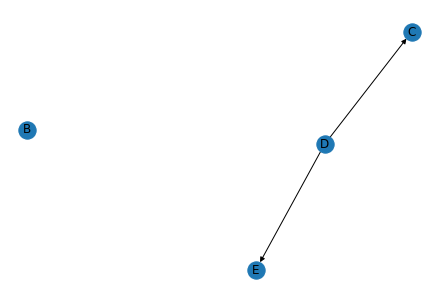

In [15]:
G_dir.add_edge("E","A")

nx.draw(G_dir, with_labels=True)
plt.show()

print('-'*50)

G_dir.remove_node("A")
nx.draw(G_dir, with_labels=True)
plt.show()

To add multiple nodes/links, we can pass in an iterable to the `add_edges_from`/`add_nodes_from` methods

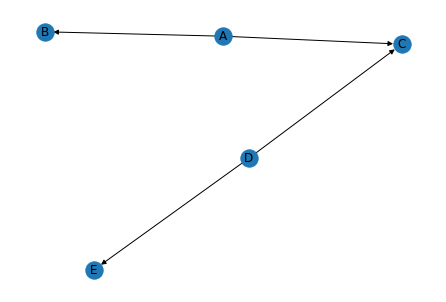

In [16]:
edgelist = [("A","B"), ("A","C")]
G_dir.add_edges_from(edgelist)

nx.draw(G_dir, with_labels=True)
plt.show()

## Weighted networks

A common extension for modelling a plethora of networks is to dispose of the binary network, and introduce continuous edges. This is suitable for representing probabilistic events.

In [17]:
A = np.array([
       [0., .5, 0., 1., 0.],
       [0., 0., 0., 0., 0.],
       [.8, 0., 0., 0., 0.],
       [0., 0., .3, 0., 1.],
       [0., 0., 0., 0., 0.]])

A

array([[0. , 0.5, 0. , 1. , 0. ],
       [0. , 0. , 0. , 0. , 0. ],
       [0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.3, 0. , 1. ],
       [0. , 0. , 0. , 0. , 0. ]])

In [18]:
Gw = nx.from_numpy_array(A)
nx.is_weighted(Gw)

True

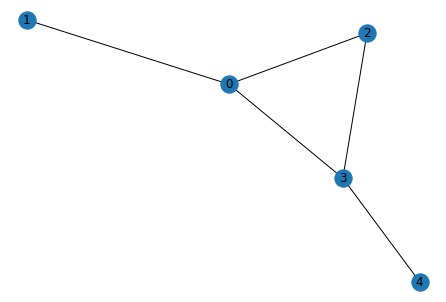

In [19]:
pos = nx.spring_layout(Gw)
nx.draw(Gw, pos, with_labels=True)

Graph / edge / node attributes can be accessed as follows.

In [123]:
Gw.edges.data()

EdgeDataView([(0, 1, {'weight': 0.5}), (0, 3, {'weight': 1.0}), (0, 2, {'weight': 0.8}), (2, 3, {'weight': 0.3}), (3, 4, {'weight': 1.0})])

In this case, the edges carry an attribute called weight. To visualize the weightedness, we can use some related drawing functions:

In [124]:
# accesss edge weights
weights = nx.get_edge_attributes(Gw, "weight")

# define line width for plotting
thickness = np.array([*weights.values()]) * 3

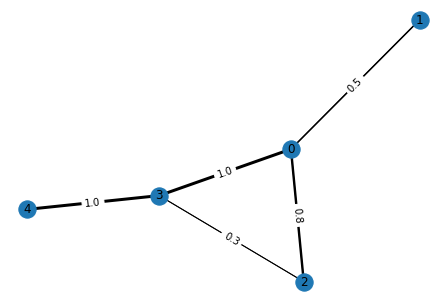

In [125]:
pos = nx.spring_layout(Gw, seed=2)

nx.draw(Gw, pos, with_labels=True)
nx.draw_networkx_edges(Gw, pos, width=thickness) #draw only edges 
nx.draw_networkx_edge_labels(Gw, pos, edge_labels=weights) # draw only edge labels

plt.show()

# Graph measures
Graph metrics are numbers that quanitfy certain properties of a network (global metrics) or about specific nodes in the network (local metrics). Because it is hard to infer things about a network simply by looking at it, these numbers capture the essence of a network, and lets us test specific hypotheses about network structure. We have already seen nE and nV.

G has 5 nodes connected by 5 edges


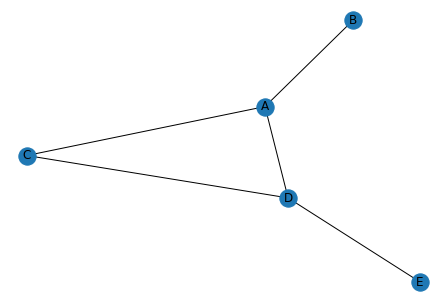

In [22]:
nV = G.number_of_nodes()
nE = G.number_of_edges()

print(f"G has {nV} nodes connected by {nE} edges")
nx.draw(G, with_labels=True)

### Node degree
We can go more deeply and inspect the links to a single node. We call this the *node degree* (k).

In [23]:
# Whole network
G.degree

DegreeView({'A': 3, 'B': 1, 'C': 2, 'D': 3, 'E': 1})

In [24]:
# How many links does A have?
G.degree['A'] # 3 neighbors

3

Take some time to study this figure from Rubinov and Sporns (2010), which summarizes most important network measures. 

<img src="assets/rubinov_sporns_2010_neuroimage.png"
     alt="graph metrics"
     width=1000
     style="float: left; margin-right: 10px;" />

##### A bunch of other graph metrics exist that quantify importance of a node within a network.
These are collectively termed "centrality", but all quantify slightly different things.

- degree centrality
- betweenness centrality
- closeness centrality

##### Other metrics quantify overall network structure
- density
- efficiency
- small-worldness
- modularity


The various metrics are tempting to use, but it is crucial to interpret them according to the network you happen to study.

## Visualizing centrality

In [25]:
A = np.array([
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

A
G = nx.from_numpy_array(A)
pos = nx.layout.spring_layout(G, seed=1)

Text(0.5, 1.0, 'Degree centrality')

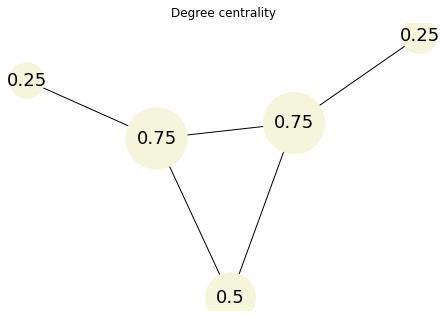

In [26]:
deg = nx.centrality.degree_centrality(G)

# plotting: 
node_size = np.array([*deg.values()]) * 5e3
nx.draw(G, pos=pos, labels=deg, node_color='beige', font_size=18, font_color='k', node_size=node_size)
plt.title('Degree centrality')


### Visualizing bottlenecks (betweenness centrality)
Try to convince yourself of why the numbers below make sense

Text(0.5, 1.0, 'Bottleneck centrality')

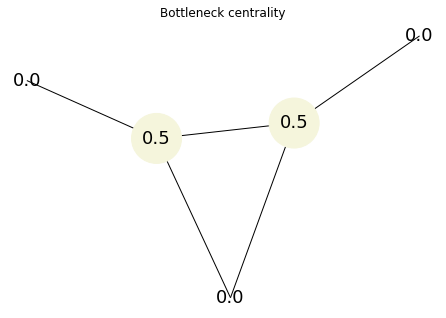

In [27]:
btw = nx.betweenness_centrality(G)

# plotting
node_size = np.array([*btw.values()]) * 5e3
nx.draw(G, pos=pos, labels=btw, node_size=node_size, node_color='beige', font_size=18, font_color='k')
plt.title('Bottleneck centrality')

Notice how the bottom node has a high degree centrality, but low bottleneck centrality. This might represent an idle train station when goods are being transported from the far right to far left node.

Text(0.5, 1.0, 'Clustering Coefficient')

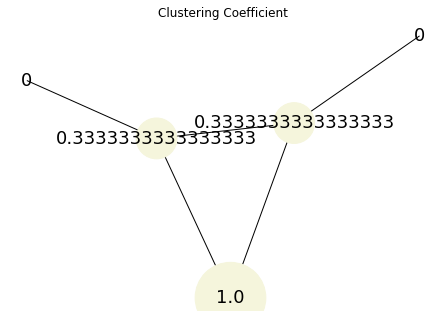

In [28]:
cc = nx.clustering(G)

# plotting
node_size = np.array([*cc.values()]) * 5e3
nx.draw(G, pos=pos, labels=cc, node_size=node_size, node_color='beige', font_size=18, font_color='k')
plt.title('Clustering Coefficient')

# Global metrics

Some of the global metrics are simply calculated by the nodal average

In [29]:
# 

# A motivating case:
## How to navigate around on the world wide web? 
Consider the world wide web (WWW), one of the more familiar networks of everyday life. When performing a search with your search engine of choice, it has to sort the results based on some kind of importance metric. The old method of doing this was to base it upon page *content*, and rate it accordingly. This method yielded very poor results. An ingenious milestone was, paradoxically, to dismiss the site content, and *only* look at its **topological** position in the network.

### PageRank
We use the seemingly circular argument: a page (node) is important if other important pages point (link) to it. We start with an initial distribution of "importance" between the nodes, then at each iteration the node redistributes its own importance determined by their outward links (imagine a surfer who at each time step has a certain probability of moving to a new page). This process is allowed to repeat, and will at some point reach steady state. The below image has already reached steady state.


<img src="assets/PageRanks-Example_345Kai_no(c).jpg"
     alt="graph metrics"
     width=500
     style="float: left; margin-right: 10px;" />
(image credit to 345Kai wikipedia)

We will go on to reproduce the above figure from the network data.

In [30]:
np.set_printoptions(2)

In [31]:
# define the edges. A is set to link to all other pages
#(a mathematical necessity because it has no outward links)

M = np.array([
       [1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

#### Exercise 2. normalize the edges such that the sum of the columns equal to 1.

Hint: first compute the column sums (yielding a vector) **(a)**, then divide each column by that vector (broadcasting) **(b)**. Verify that the columns sum to one **(c)**.

#### a)

In [32]:
# %load solutions/ex0_2a.py
col_sums = np.sum(M, axis=0)
col_sums

array([11.,  1.,  1.,  2.,  3.,  2.,  2.,  2.,  2.,  1.,  1.])

#### b)

In [33]:
# %load solutions/ex0_2b.py
M = M / col_sums[np.newaxis, :] #newaxis ensures the broadcasting is correct
M

array([[0.09, 0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 1.  , 0.5 , 0.33, 0.5 , 0.5 , 0.5 , 0.5 , 0.  , 0.  ],
       [0.09, 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.5 , 0.5 , 0.5 , 0.5 , 1.  , 1.  ],
       [0.09, 0.  , 0.  , 0.  , 0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

#### c)

In [34]:
# %load solutions/ex0_2c.py
np.sum(M, axis=0)
#or
np.isclose(np.sum(M, axis=0), 1.)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### The pagerank algorithm

In [35]:
# from https://en.wikipedia.org/wiki/PageRank#Simplified_algorithm

def pagerank(M, num_iterations: int = 100, d: float = 0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    M : numpy array
        adjacency matrix where M_i,j represents the link from 'j' to 'i', such that for all 'j'
        sum(i, M_i,j) = 1
    num_iterations : int, optional
        number of iterations, by default 100
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = M.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    M_hat = (d * M + (1 - d) / N)
    for i in range(num_iterations):
        v = M_hat @ v
    return v

#### Exercise 3: 
Compute the pagerank (call it `pr`) and confirm it matches with the figure shown above (within a reasonable margin of error).

In [36]:
# %load solutions/ex0_3.py
pr = pagerank(M)
print(pr*100)
np.sum(pr)

[[ 3.28]
 [38.44]
 [34.29]
 [ 3.91]
 [ 8.09]
 [ 3.91]
 [ 1.62]
 [ 1.62]
 [ 1.62]
 [ 1.62]
 [ 1.62]]


1.000000000000001

## Visualize that the results check out

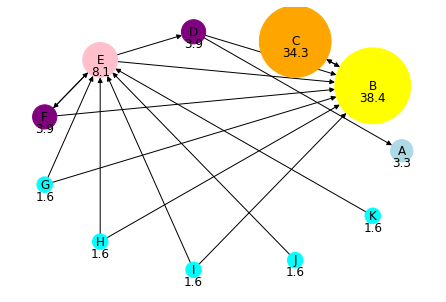

In [37]:
names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K']
colors = ['lightblue', 'yellow', 'orange', 'purple', 'pink', 'purple', 'cyan','cyan','cyan','cyan','cyan']

G = nx.from_numpy_array(M.T, create_using=nx.DiGraph)
nx.relabel_nodes(G, lambda k: dict(zip(range(11), names))[k], copy=False)
# remove edges from A
rem = [edge for edge in G.edges if edge[0]=='A']
G.remove_edges_from(rem)

pos = nx.layout.circular_layout(G)

# Make node size depend on pagerank
pr = dict(zip(names, pr.flatten()))
for k,v in pr.items():
    pr[k] = round(v*100, 1)
node_size = np.array(list(pr.values()))*150

nx.draw(G, pos=pos, node_color=colors, with_labels=True, node_size=node_size)
for k,v in pos.items(): v[1]-=0.1 # nudge the y coordinate slightly
nx.draw_networkx_labels(G, labels=pr, pos=pos)
plt.show()

<img src="assets/PageRanks-Example_345Kai_no(c).jpg"
     alt="graph metrics"
     width=500
     style="float: left; margin-right: 10px;" />

We can rearrange positions to better match the figure using netgraph's `InteractiveGraph`

In [38]:
#import sys
#!{sys.executable} -m pip install netgraph

<IPython.core.display.Javascript object>


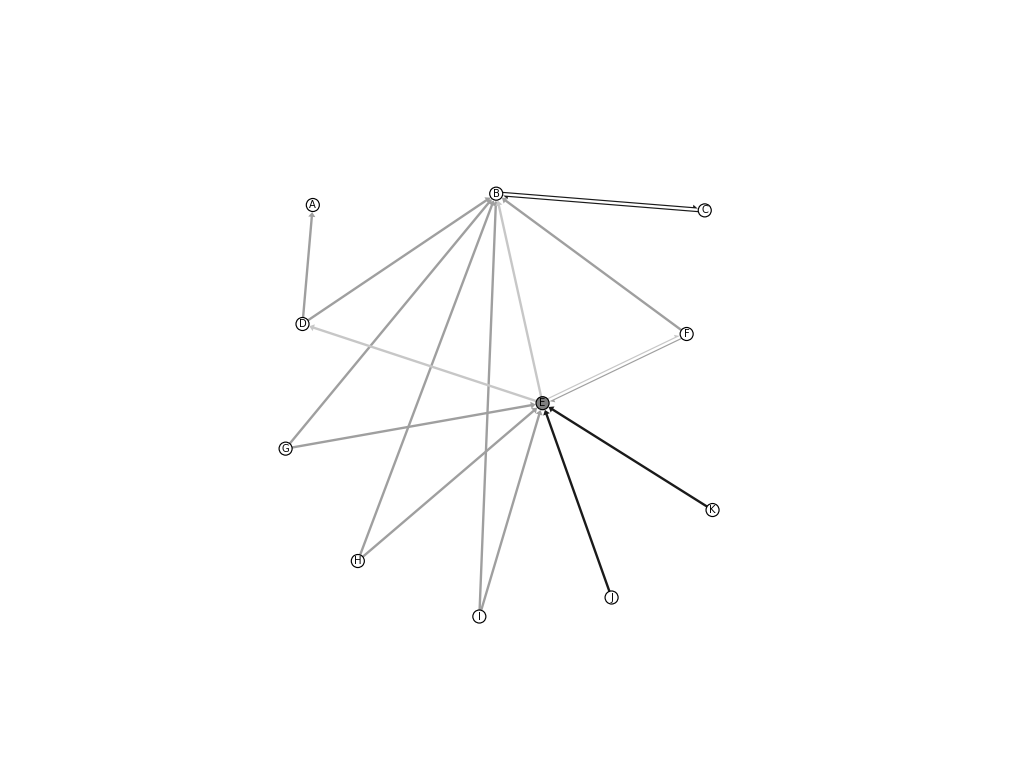

In [43]:
import netgraph
%matplotlib notebook 
#^this must be activated to interact with the plot
 
plot_instance = netgraph.InteractiveGraph(G, node_positions=pos, node_labels=dict(zip(G.nodes(),G.nodes())))
######## drag nodes around #########

In [44]:
# Save new positions:
new_pos = plot_instance.node_positions

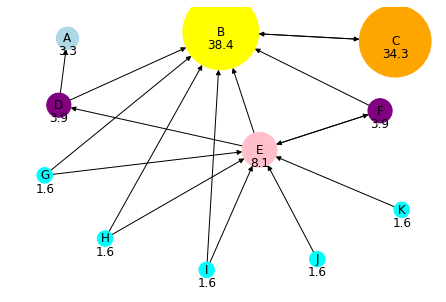

In [45]:
%matplotlib inline
# draw with the new positions
nx.draw(G, pos=new_pos, node_color=colors, with_labels=True, node_size=node_size)
for k,v in new_pos.items(): v[1]-=0.1
nx.draw_networkx_labels(G, labels=pr, pos=new_pos)
plt.show()

# Save to gml
If we wish to save the new positions so we can reload it in the future, we can save the graph as a gml file.

In [46]:
# add node attributes X and Y
for node,(x,y) in new_pos.items():
    G.nodes[node]['x'] = float(x)
    G.nodes[node]['y'] = float(y)

nx.write_gml(G, "pr_network.gml")

# Load gml

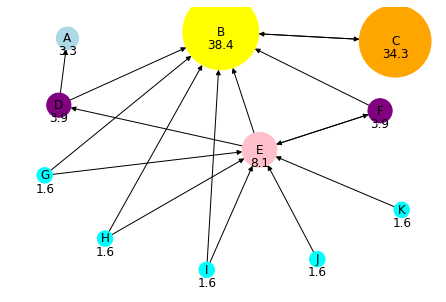

In [47]:
# load
Gl = nx.read_gml("pr_network.gml")

# parse the stored coordinates
posl = {node:[v["x"], v["y"]] for node,v in Gl.nodes.data()}
for k,v in posl.items(): v[1]-=0.1 # nudge the y coordinate slightly

nx.draw(G, pos=pos, node_color=colors, with_labels=True, node_size=node_size)
nx.draw_networkx_labels(G, labels=pr, pos=posl)
plt.show()

This example was simply for illustration, we could just as easily have used networkX's own implementation of pagerank.

# Network structure 
So far we have analysed nodal properties. But the point of networks is to a large extent to study the whole system, so we need network-level statistics. This is important to highlight concepts such as small-world networks. From the famous Milgram experiment of the 1960s, it was discovered that the *distance* (number of *jumps*) between any two nodes is staggeringly small. In fact, almost anyone can be connected to the Queen of England by maximum 7 steps. This is a result of the large-scale network structure, known as the small-world property. 

## Network components


### Cliques
A clique is a highly clustered subgraph in which every node is connected to all the others.

### Assortative mixing
When like attracts like: in a typical schoolyard children are more likely to befriend members of the same gender. This leaves the friendship network a modular one. Assortative mixing can be calculated between any value of choice, such as a predefined category, or even by degree. In that case, high-degree nodes tend to associate more with other high-degree nodes - forming *rich clubs*

### Modularity
A module is a subgraph whose members are more strongly connected to eachother than they are to other modules. The degree of modularity of a network given a partition is a number between 0 and 1 called Q.  

Modularity is visualised in this adjacency matrix from Networks - An Introduction (Newman, 2010)
<img src="assets/modules_grade.png" style="float:left" width=400>

<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

### (Giant) Components
Often graphs are not fully connected - i.e. there exist no *path* from any pair nodes. Such a disconnected graphs is partitioned into *connected components*. We are often interestered in the largest of these, for various applications.

## Degree distribution

A much more interesting property than degree of individual nodes is to look at the whole distribution for the complete network. This property is very important in the field of network science.

This is a probability distribution, and must thus sum to 1.

### Example: plotting the degree distribution of the graph G

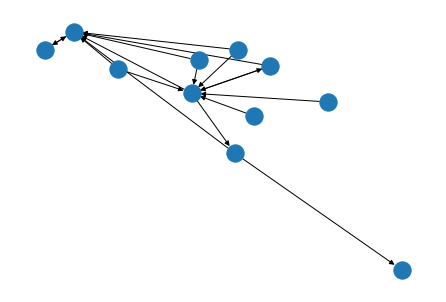

In [48]:
nx.draw(G)

#### Exercise 4. Plot the histogram for G's degree distribution

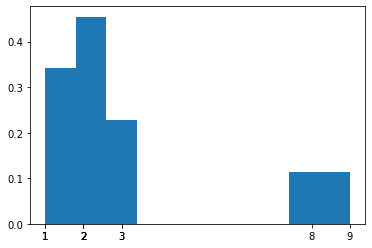

In [133]:
# %load solutions/ex0_4.py
# get list of degrees
deg = [d for n,d in G.degree]
# density=True does normalization for us
plt.hist(deg, density=True)
plt.xticks(deg)
plt.show()

But degree distribution is not too informative for small networks like this. Lets construct a *random* network of arbitrary size:

# Random networks

Random networks are important for things as creating null-models for statistical analysis, and for generating large complex networks. Thus we need a probabilistic model to construct them.

### The Erdös-Reiny model.
The Erdös-Reiny model is a naive approach. We specify the number of nodes (n) and the probability than any two nodes are connected (p). We start with a fully disconnected graph, and for each node-pair we add a link with probability p.

#### Exercise 5. Make a function `er` which takes number of nodes `n` and probability `p` and returns a random network (adjacency matrix). 

In [50]:
#% load solutions/ex0_5.py
def er(n, p):
    A = np.random.rand(n,n) 
    A = (A < p).astype(np.int) # only keeps edges less than p
    np.fill_diagonal(A, 0) # don't allow self-loops
    return A

In an E-R network, the degree distribution is binomially distributed. By the law of large numbers, this converges to the Gaussian distribution when N is large, and p is small. 
Thus this network is characterized by a *typical* node, being the average degree of the network, like the normal distribution is characterized by the mean. 

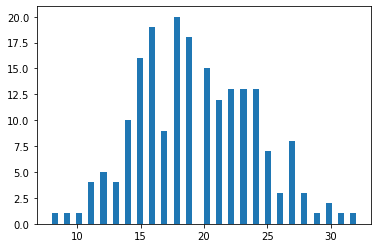

In [132]:
Q = er(200, .1)
plt.hist(Q.sum(0), bins=50)
plt.show()

This distribution does not however come very close to resembling the structure of real-world networks. So what is the *typical* node of such a network? Let us first look at a random model which is a much better approximation to real networks.

### The Barabasi-Albert model
#### Rich get richer
The Barabasi-Albert model is more sophisticated, and better at modelling real networks. The key innovation is that new nodes don't make connections at random, but with *preferential attachment*: they prefer to connect to nodes which are already well-connected. We need to specify the number of nodes in the network, as well the number of edges each new node will bring to the network. m must be less than n.

#### Exercise6: make a function `ba` which takes number of nodes `n` and how many new connections it will make `m` and returns the graph (adjacency matrix).

In [134]:
# %load solutions/ex0_6.py

def ba(n,m):
    A = np.zeros((n,n))
    
    k_sum = np.zeros(n)
    for node in range(n):
        # add m new links
        if node < m: 
            # can only add node number of links
            A[node, :node], A[:node, node] = 1,1
            k_sum += node*2
        else:
            #randomly add m new links
            probs = A.sum(1) / k_sum
            idx = np.random.choice(range(node), size=m, p=probs[:node], replace=False)
            A[node,idx], A[idx, node] = 1,1
            k_sum += 2*m
    return A

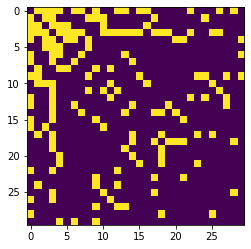

In [135]:
plt.imshow(ba(30,3))

Luckily, both these and more functions exist in the `nx` library to generate random graphs: https://networkx.org/documentation/stable/reference/generators.html

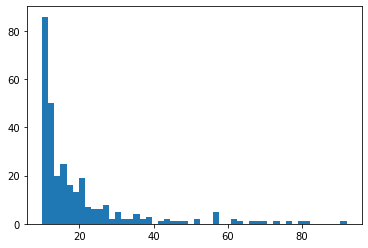

In [118]:
Q = ba(300, 10)
plt.hist(Q.sum(0), bins=50)
plt.show()

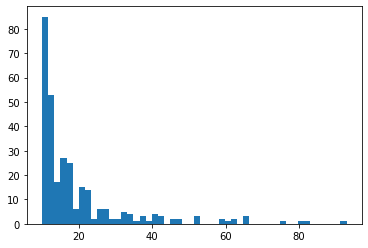

In [136]:
# compare to networkx's own implementation
Q=nx.barabasi_albert_graph(300,10)
plt.hist(dict(Q.degree()).values(), bins=50)
plt.show()

### Comparing Random networks

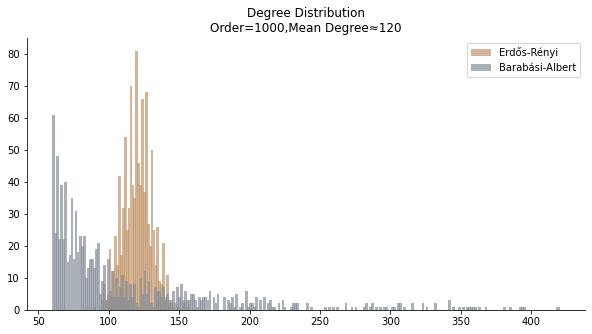

In [101]:
from matplotlib import pyplot as plt 
N=1000

g1=nx.erdos_renyi_graph(n=N,p=120/N)
g2=nx.barabasi_albert_graph(n=N,m=60)

ax=plt.figure(figsize=(10,5)).add_subplot(111)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.hist(dict(g1.degree).values(),
         alpha=0.7,bins=50,width=2,
         label='Erdős-Rényi',color='#C1946A')
plt.hist(dict(g2.degree).values(),
         alpha=0.7,bins=250,width=2,
         label='Barabási-Albert',color='#878F99')
plt.title('Degree Distribution\nOrder=1000,Mean Degree≈120')
plt.legend(loc=0)
plt.show()

The way in which we construct the random network determines its properties. The Erdos-Renyi model has degrees centered around the mean like a bell curve. The Barabasi-Albert model has a heavy tail - meaning that they have a much larger proportion of hubs than the ER-network, where they are virtually absent. This scale-free nature of the BA-model is representative of many real-world networks studied, such as the internet and the connectome of C. elegans.

The file football.gml contains the network of American football games
between Division IA colleges during regular season Fall 2000, as compiled
by M. Girvan and M. Newman.  The nodes have values that indicate to which
conferences they belong.  The values are as follows:

  0 = Atlantic Coast
  1 = Big East
  2 = Big Ten
  3 = Big Twelve
  4 = Conference USA
  5 = Independents
  6 = Mid-American
  7 = Mountain West
  8 = Pacific Ten
  9 = Southeastern
 10 = Sun Belt
 11 = Western Athletic

If you make use of these data, please cite M. Girvan and M. E. J. Newman,
Community structure in social and biological networks,
Proc. Natl. Acad. Sci. USA 99, 7821-7826 (2002).

Correction: Two edges were erroneously duplicated in this data set, and
have been removed (21 SEP 2014)

BrighamYoung         12
FloridaState         12
Iowa                 12
KansasState          12
NewMexico            11
TexasTech            12
PennState            12
SouthernCalifornia   12
ArizonaState         11
SanDie

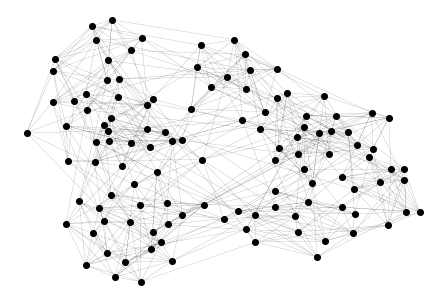

In [191]:
## import urllib.request as urllib
## import io
## import zipfile
## 
## import matplotlib.pyplot as plt
## import networkx as nx
## 
## url = "http://www-personal.umich.edu/~mejn/netdata/football.zip"
## 
## sock = urllib.urlopen(url)  # open URL
## s = io.BytesIO(sock.read())  # read into BytesIO "file"
## sock.close()
## 
## zf = zipfile.ZipFile(s)  # zipfile object
## txt = zf.read("football.txt").decode()  # read info file
## gml = zf.read("football.gml").decode()  # read gml data
## # throw away bogus first line with # from mejn files
## gml = gml.split("\n")[1:]
## G = nx.parse_gml(gml)  # parse gml data
## 
## print(txt)
## # print degree for each team - number of games
## for n, d in G.degree():
##     print(f"{n:20} {d:2}")
## 
## options = {
##     "node_color": "black",
##     "node_size": 50,
##     "linewidths": 0,
##     "width": 0.1,
## }
## nx.draw(G, **options)
## plt.show()

In [194]:
# TO BE ADDED
#- Regular networks
#- components and communities
#- Small world networks:
#- Binomial / Gaussian 
#- Scale free (exponential)


In [195]:
## TODO
## go through random graph, degree distribution
## go through small-worlds 
## show img of regular -> sw -> random

## See github course for inspo https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience
## See https://github.com/je-suis-tm/graph-theory